In [17]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image = cv2.imread('/content/rose_1024.tif')

if image is not None:
    print("Dimensions de l'image (hauteur, largeur, canaux) :", image.shape)
else:
    print("L'image n'a pas pu être chargée. Vérifiez le nom ou le chemin du fichier.")

Dimensions de l'image (hauteur, largeur, canaux) : (1024, 1024, 3)


In [19]:
image

array([[[21, 21, 21],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[20, 20, 20],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[17, 17, 17],
        [17, 17, 17],
        [20, 20, 20],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]]], dtype=uint8)

In [20]:
image_negative = 255 - image

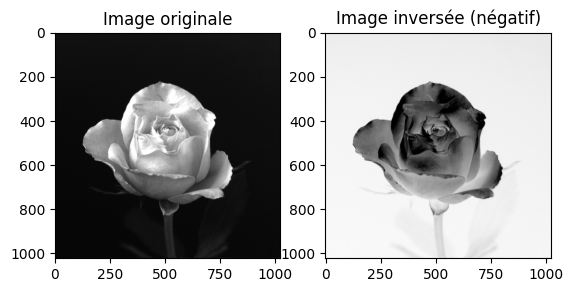

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(image_negative, cmap='gray')
plt.title("Image inversée (négatif)")

plt.show()

In [22]:
image_to_add = cv2.imread('/content/toAdd.bmp', cv2.IMREAD_GRAYSCALE)
if image_to_add is None:
    print("Error: 'toADD.bmp' could not be found or loaded.")

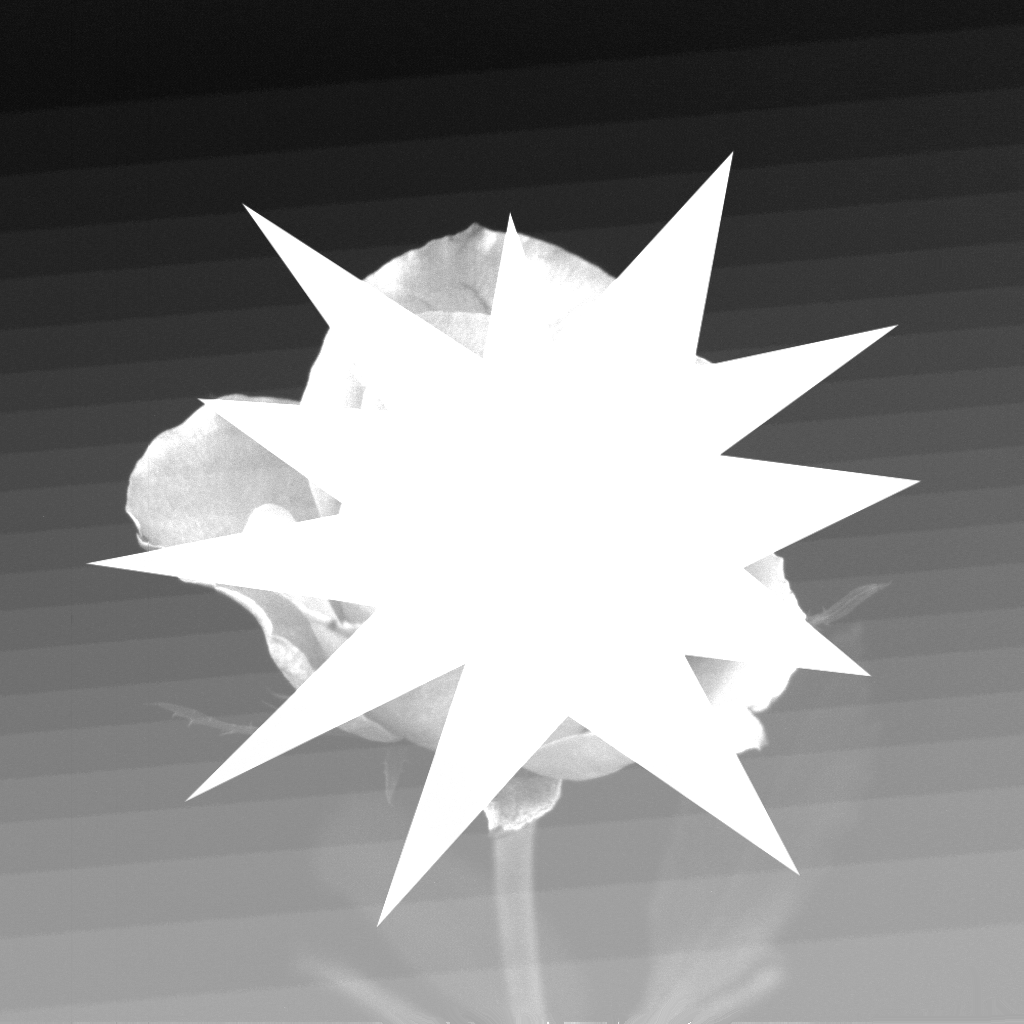

In [23]:
image_to_add_color = cv2.cvtColor(image_to_add, cv2.COLOR_GRAY2BGR)

if image.shape != image_to_add_color.shape:
    image_to_add_color = cv2.resize(image_to_add_color, (image.shape[1], image.shape[0]))

image_sum_manual = np.clip(image + image_to_add_color, 0, 255).astype(np.uint8)

image_sum_cv2 = cv2.add(image, image_to_add_color)

cv2_imshow(image_sum_cv2)

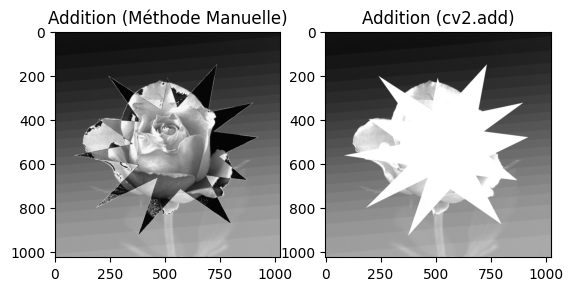

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(image_sum_manual, cmap='gray')
plt.title("Addition (Méthode Manuelle)")

plt.subplot(1, 2, 2)
plt.imshow(image_sum_cv2, cmap='gray')
plt.title("Addition (cv2.add)")

plt.show()

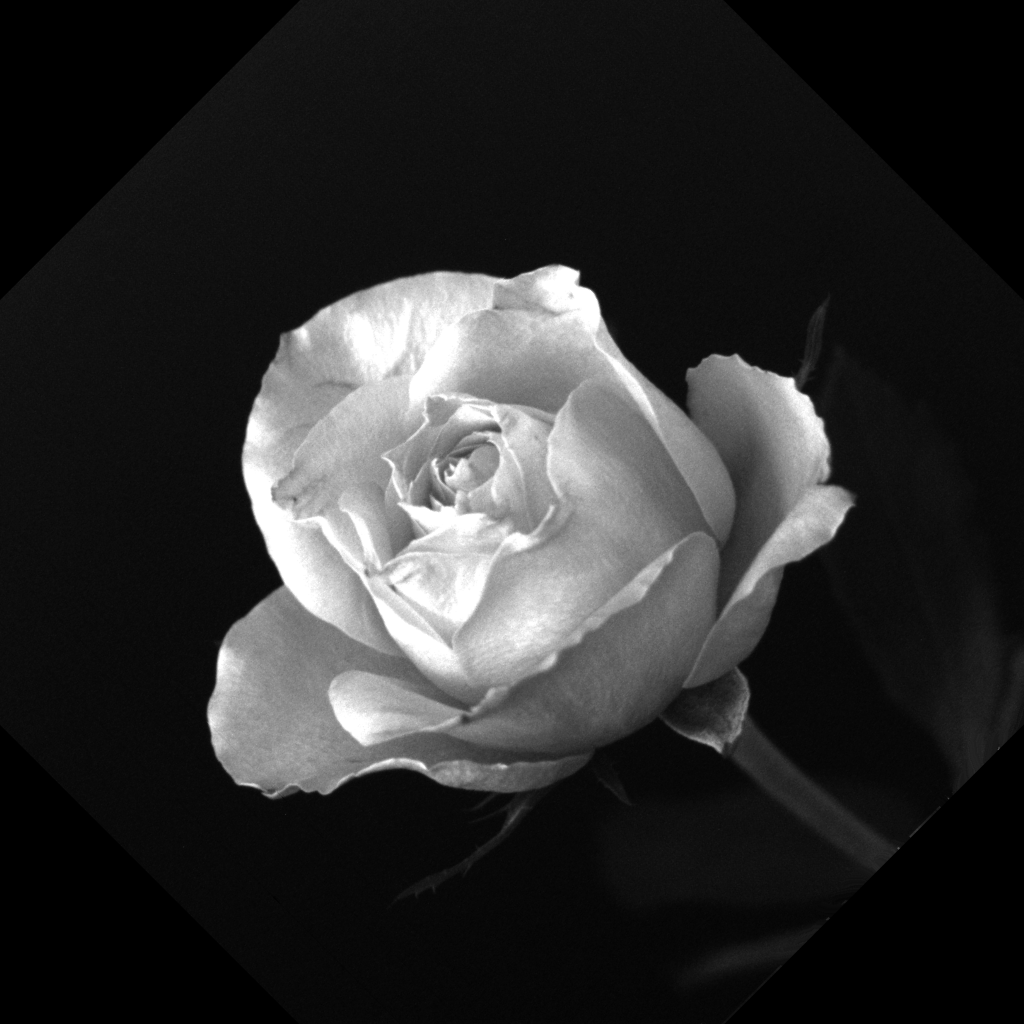

In [25]:
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 45
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

cv2_imshow(rotated_image)

# **ROTATION WITHOUT USING OPENCV**

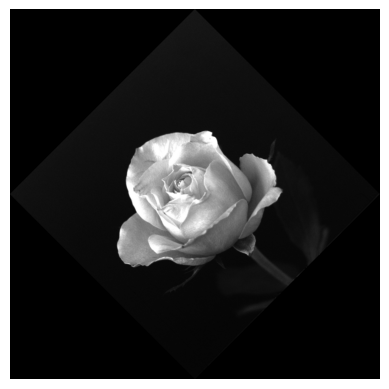

In [27]:
image = cv2.imread('/content/rose_1024.tif')

height, width = image.shape[:2]

center = (width // 2, height // 2)

angle = 45
scale = 1.9
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

cos_val = abs(rotation_matrix[0, 0])
sin_val = abs(rotation_matrix[0, 1])
new_width = int((height * sin_val) + (width * cos_val))
new_height = int((height * cos_val) + (width * sin_val))

rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.show()